# Zad 1.

Wygeneruj dane z rozkładu normalnego o średniej m = [0, 0] i kowariancji cov = [[1, 0], [0, 1]]. 
Narysuj na jednym wykresie dane oraz gęstość rozkładu normalnego (kontury) o parametrach m = [1, 0] oraz cov = [[1, 0], [0, 2]].

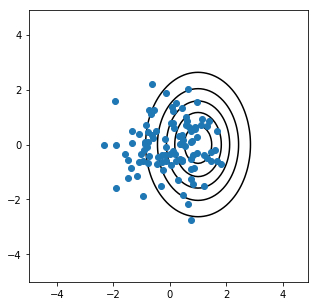

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import multivariate_normal
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]] 
rv1 = multivariate_normal(mean1, cov1)

mean2 = [1, 0]
cov2 = [[1, 0], [0, 2]] 
rv2 = multivariate_normal(mean2, cov2)

data=rv1.rvs(100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot(data[:,0],data[:,1],"o")

x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, rv2.pdf(pos), 6, colors = 'k')
plt.show()

# Zad 2.

Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów Split Normal Distribution http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf oraz klasycznych rozkładów normalnych. Narysuj na jednym wykresie dane oraz gęstość (kontury). 

Użyj:
  * danych z rozkładu jednostajnego na odcinku [-1,1] x [-1,1].
  * danych z rozkładu normalnego o średniej m = [0, 0] i kowariancji cov = [[1, 0], [0, 1]].
  * danych z pliku http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/data.txt (możesz użyć kawałka danych) 

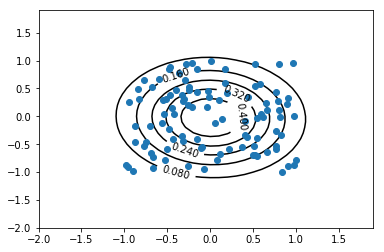

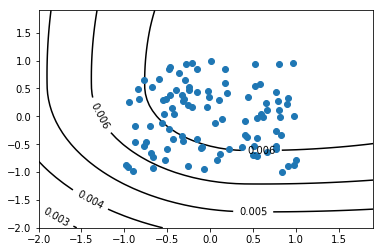

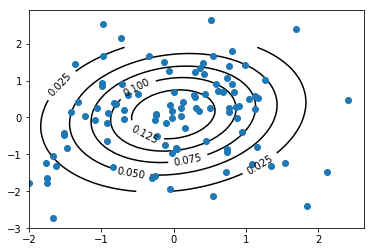

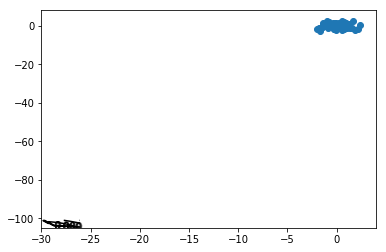

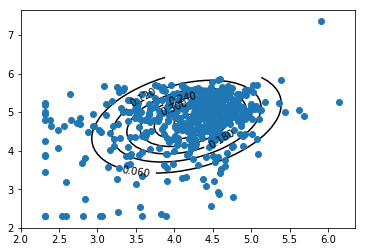

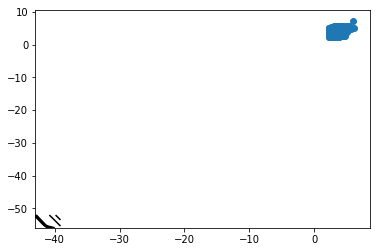

In [3]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
from functools import partial
from scipy.stats import multivariate_normal
import numpy.random as rnd
import warnings

warnings.filterwarnings('ignore')


def SN(x, m, sigma, tau):
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    if x > m:
        return c * np.exp((-1) * (x - m) ** 2 / (2 * sigma ** 2 * tau ** 2))
    else:
        return c * np.exp((-1) * (x - m) ** 2 / (2 * sigma ** 2))


def GSN(x, m, w, sigma, tau):
    result = 1
    for j in range(len(x)):
        result *= SN(np.dot(w[:, j], x - m), 0, sigma[j], tau[j])
    return result


def GSNlogfunction(X, params):
    result = 0
    (m1, m2, w11, w12, w22, sigma1, sigma2, tau1, tau2) = params
    m = np.array([m1, m2])
    w = np.array([[w11, w12], [w12, w22]])
    sigma = np.array([sigma1, sigma2])
    tau = np.array([tau1, tau2])
    for x in X:
        result += np.log(GSN(x, m, w, sigma, tau))
    return result


def get_params(params):
    (m1, m2, w11, w12, w22, sigma1, sigma2, tau1, tau2) = params
    m = np.array([m1, m2])
    w = np.array([[w11, w12], [w12, w22]])
    sigma = np.array([sigma1, sigma2])
    tau = np.array([tau1, tau2])
    return m, w, sigma, tau


def fit_and_plot_split_gaussian(data, plot_n=2):
    mini = sc.minimize(partial(GSNlogfunction, data), (0, 0, 1, 0, 1, 1, 1, 1, 1))
    r_m, r_w, r_sigma, r_tau = get_params(mini.x)
    X, Y = np.mgrid[int(r_m[0]) - plot_n: int(r_m[0]) + plot_n:.1, int(r_m[1]) - plot_n: int(r_m[1]) + plot_n:.1]
    Z = np.ones(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = GSN((X[i, j], Y[i, j]), r_m, r_w, r_sigma, r_tau)

    plt.figure()
    plt.plot(data[:, 0], data[:, 1], "o")
    CS = plt.contour(X, Y, Z, 6, colors = 'k')
    plt.axes()
    plt.clabel(CS, inline=1, fontsize=10)
    plt.show()


def fit_and_plot_gaussian(data):
    r_sigma = np.cov(data[:, 0], data[:, 1])
    r_mean = (np.mean(data[:, 0]), np.mean(data[:, 1]))
    plt.figure()
    x, y = np.mgrid[int(r_mean[0]) - 2: int(r_mean[0]) + 2:.1, int(r_mean[1]) - 2: int(r_mean[1]) + 2:.1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x;
    pos[:, :, 1] = y
    plt.plot(data[:,0],data[:,1],"o")
    rv = multivariate_normal(r_mean, r_sigma)
    CS = plt.contour(x, y, rv.pdf(pos), 6, colors = 'k')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.show()


X1 = np.column_stack((np.random.uniform(-1, 1, 100), np.random.uniform(-1, 1, 100)))
fit_and_plot_gaussian(X1)
fit_and_plot_split_gaussian(X1)

sigma = np.array([[1, 0], [0, 1]])
mean = (0, 0)
X2 = rnd.multivariate_normal(mean, sigma, 100)
fit_and_plot_gaussian(X2)
fit_and_plot_split_gaussian(X2)

X3 = []
f = open('data.txt','r')
for line in f:
    X3.append(list(map(float, line.replace("\n","").split(' '))))
X3 = np.array(X3)
fit_and_plot_gaussian(X3)
fit_and_plot_split_gaussian(X3)